In [41]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [42]:
np.random.seed(27)
tf.random.set_seed(27)

In [43]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [44]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [45]:
# On normalise les données
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [46]:
# Transformer les étiquettes (labels) sous forme d'entiers (0 à 9) en vecteurs one-hot, c’est-à-dire des vecteurs binaires de taille 10.
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

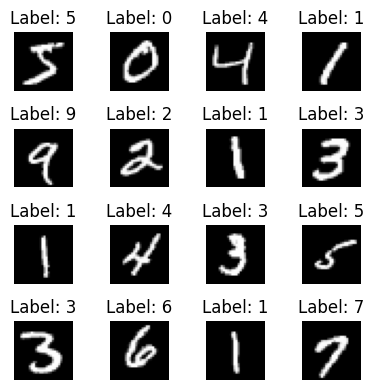

In [47]:
# Voir les dimensions des données
plt.figure(figsize=(4, 4))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [48]:
ffn = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(28, 28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

    Adam est un super mélange de deux optimisateurs populaires : AdaGrad et RMSprop.

    Il ajuste automatiquement le pas d’apprentissage (learning rate) pour chaque poids.

    Imagine-le comme un chef qui goûte la sauce à chaque étape et ajuste les ingrédients de façon très fine.

🔍 Alternatives possibles : sgd, rmsprop, adagrad, mais adam est souvent un excellent choix par défaut.
2. loss='categorical_crossentropy' 📉

    C’est la fonction de perte, c’est-à-dire comment on mesure à quel point le modèle se trompe.

    Ici, tu fais de la classification multiclasse (0 à 9 → 10 classes), donc tu veux une perte adaptée aux probabilités.

    categorical_crossentropy mesure la distance entre la distribution prédite (ex : [0.1, 0.1, ..., 0.9]) et la vraie (ex : [0, 0, ..., 1]).

    Imagine que tu fais une recette avec un dosage précis, et tu veux que le chef (le modèle) tombe exactement sur le bon dosage — sinon, tu perds des points.

💡 Si tes étiquettes n’étaient pas en one-hot mais en entiers (0, 1, 2,...), tu aurais utilisé sparse_categorical_crossentropy.
3. metrics=['accuracy'] 🎯

    Ce que tu veux surveiller pendant l'entraînement.

    Ici, tu veux voir à quel point ton modèle classe correctement les chiffres.

    L’accuracy (exactitude) correspond au pourcentage d’images bien classées.

📊 C’est ce que tu verras affiché à chaque époque dans le fit().

In [49]:
ffn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

| Argument               | Signification                                                             |
| ---------------------- | ------------------------------------------------------------------------- |
| `x_train`              | Images d'entraînement (60 000 images de chiffres 28×28, normalisées)      |
| `y_train_one_hot`      | Labels encodés en one-hot (par exemple, `5 → [0,0,0,0,0,1,0,0,0,0]`)      |
| `epochs=10`            | Le modèle va passer **10 fois** sur l'ensemble du jeu de données          |
| `batch_size=32`        | À chaque étape d'entraînement, le modèle voit **32 images à la fois**     |
| `validation_split=0.2` | **20 % des données** d'entraînement sont utilisées pour la **validation** |


In [50]:
ffn.fit(x_train, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8573 - loss: 0.4825 - val_accuracy: 0.9592 - val_loss: 0.1381
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9613 - loss: 0.1302 - val_accuracy: 0.9650 - val_loss: 0.1161
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9736 - loss: 0.0854 - val_accuracy: 0.9665 - val_loss: 0.1131
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9816 - loss: 0.0595 - val_accuracy: 0.9695 - val_loss: 0.1063
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9862 - loss: 0.0432 - val_accuracy: 0.9702 - val_loss: 0.1119
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9893 - loss: 0.0330 - val_accuracy: 0.9703 - val_loss: 0.1159
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9911 - loss: 0.0287 - val_accuracy: 0.9713 - val_loss: 0.1170
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9929 - loss: 0.0214 - 

In [51]:
score = ffn.evaluate(x_test, y_test_one_hot, verbose=0)
print(f"Test loss: {score[0]:.4f}, Test accuracy: {score[1]:.4f}")  



Test loss: 0.1048, Test accuracy: 0.9762


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


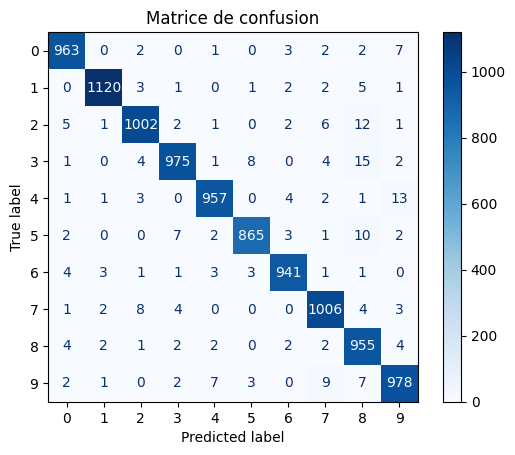

In [ ]:
y_pred = ffn.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()  

Number of misclassified images: 238


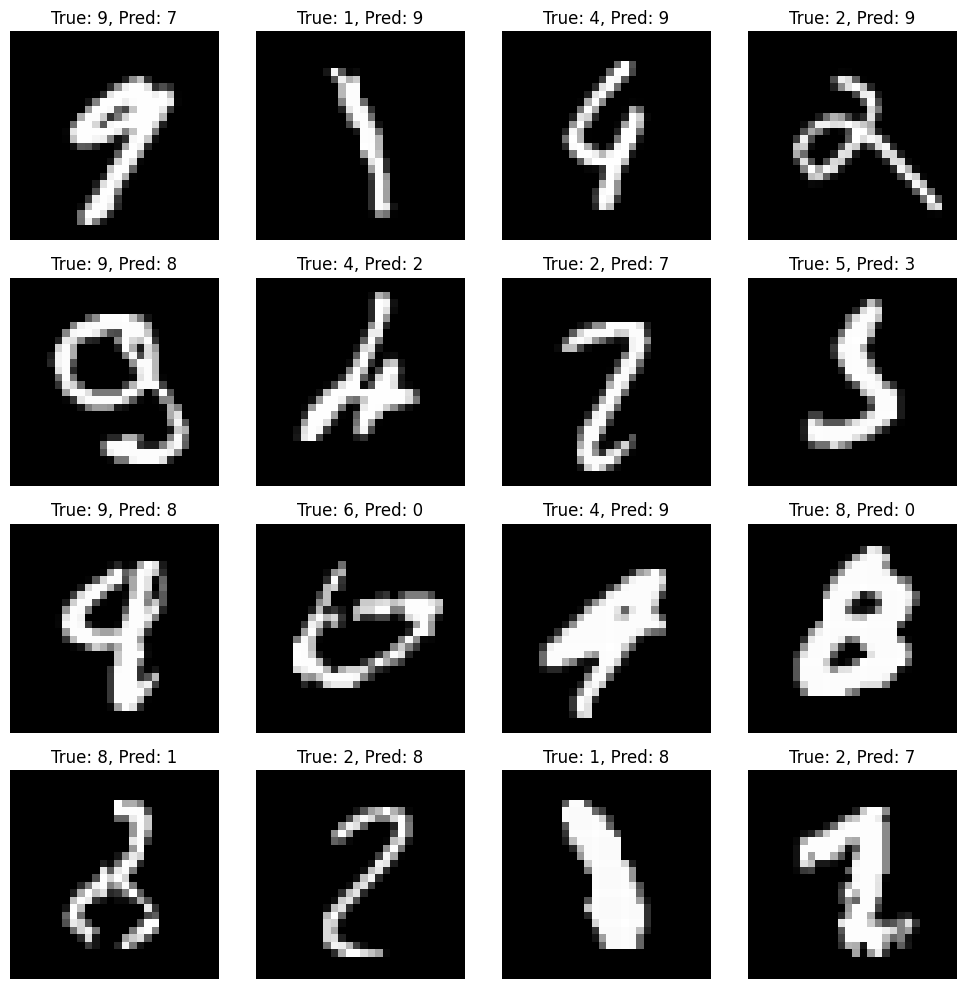

In [ ]:
errors = np.where(y_pred_classes != y_test)[0]
print(f"Number of misclassified images: {len(errors)}")
if len(errors) > 0:
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(errors[:16]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(x_test[idx], cmap='gray')
        plt.title(f"True: {y_test[idx]}, Pred: {y_pred_classes[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()